# Exercise Set 6: Data Structuring 2

*Afternoon, August 15, 2018*

In this Exercise Set we will continue working with the weather data you downloaded and saved in Exercise Set 4. 

> **_Note_**: to solve the bonus exercises in this exerise set you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it tomorrow).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

First load in the required modules and set up the plotting library:

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Exercise Section 6.1: Weather, part 2

This section is the second part of three that analyzes NOAA data. The first part is Exercise Section 4.1, the last part is Exercise Section 7.2.

> **Ex. 6.1.1:** Load the CSV data you stored yesterday as part of Exercise Section 4.1. If you didn't manage to save the CSV file, you can use the code in [this gist](https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4) to load in the NOAA data.

In [4]:
# [Answer to Ex. 6.1.1]

saved_data_yesterday = False   # Change this if you saved the data yesterday. Either solution is fine 

# Solution 1
if saved_data_yesterday:
    
    df_select = pd.read_csv('C:/Users/qsd161/Desktop/asd/df_sorted.csv')
    df_select.head()

# Solution 2 (using the gist)
else:
    
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

    df_weather = pd.read_csv(url,
                             compression='gzip',
                             header=None).iloc[:,:4]

    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
    df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
    df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])

> **Ex. 6.1.2:** Convert the date formatted as string to  datetime. Make a new column with the month for each observation.

In [5]:
# [Answer to Ex. 6.1.2]

# datetime column
df_select['datetime_dt'] = pd.to_datetime(df_select['datetime'], format = '%Y%m%d')

# month column
df_select['month'] = df_select.datetime_dt.dt.month

df_select.head()

,station,datetime,obs_type,obs_value,TMAX_F,datetime_dt,month
0,ITE00100550,18640101,TMAX,1.0,33.80,1864-01-01,1
75,ITE00100550,18640102,TMAX,0.8,33.44,1864-01-02,1
152,ITE00100550,18640103,TMAX,-2.8,26.96,1864-01-03,1
227,ITE00100550,18640104,TMAX,0.0,32.00,1864-01-04,1
305,ITE00100550,18640105,TMAX,-1.9,28.58,1864-01-05,1


> **Ex. 6.1.3:** Set the datetime variable as temporal index and make a timeseries plot.

> _Hint:_ for this you need to know a few methods of the pandas DataFrames and pandas Series objects. Look up `.set_index()` and `.plot()`. 

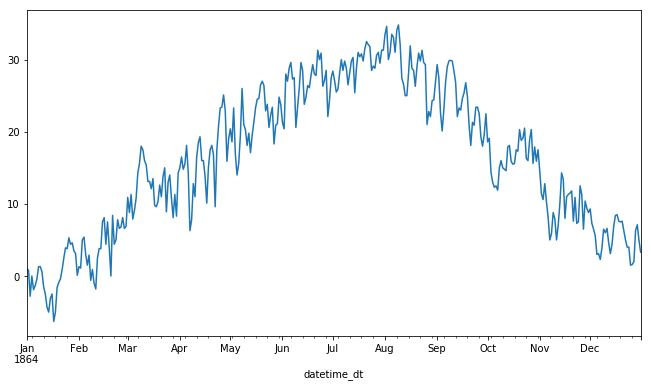

In [6]:
# [Answer to Ex. 6.1.3]

df_select\
    .set_index('datetime_dt')\
    .obs_value\
    .plot(figsize=[11,6])
plt.show()

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module. 

In [ ]:
# [Answer to Ex. 6.1.4]

# This will be in assignment 1

> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

In [ ]:
# [Answer to Ex. 6.1.5]

# This will be in assignment 1

##  Exercise Section 6.2: 

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 6.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [2]:
# [Answer to Ex. 6.2.1]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
head = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex',
'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']

df = pd.read_csv(url,
                 sep = ',',
                 skipinitialspace = True,      # Removes whitespace
                 names = head,
                 index_col = False             # dont use 'age' as the index (!)
                )
df.iloc[24:35]

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


> **Ex. 6.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 6.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [59]:
# [Answer to Ex. 6.2.2]

# The data uses '?' for NA's. To replace them we can simply run 
from numpy import NaN

df.replace('?', NaN, inplace = True)
df_clean = df.dropna()

print("we've dropped {} rows".format(len(df) - len(df_clean)))

we've dropped 2399 rows


> **Ex. 6.2.3:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [76]:
# [Answer to Ex. 6.2.3]

# first we create a dummy for earning more than 50K
df_clean['HighWage'] = (df_clean['wage'] == '>50K').astype(int)
# then group by sex and calculate the mean
df_clean[['sex', 'HighWage']]\
        .groupby('sex')\
        .mean()

C:\Users\qsd161\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,HighWage
sex,
Female,0.113678
Male,0.313837


> **Ex. 6.2.4:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ the `.query()` method is extremely useful for filtering data.

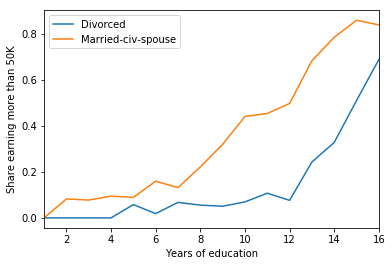

In [100]:
# [Answer to Ex. 6.2.4]

df_clean[['marital_status', 'HighWage', 'educ_num']]\
        .groupby(['marital_status', 'educ_num'])\
        .mean()\
        .reset_index()\
        .query("marital_status == 'Divorced' | marital_status == 'Married-civ-spouse'")\
        .set_index('educ_num')\
        .groupby('marital_status')\
        .HighWage\
        .plot()

plt.xlabel('Years of education')
plt.ylabel('Share earning more than 50K')
plt.legend()